In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw


Populating the interactive namespace from numpy and matplotlib


In [2]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/v45/pas561/mom/archive/mom025_ocean_grid.nc'
#vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

#vgrid_file ='/g/data3/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'
vgrid_file ='/g/data/v45/pas561/mom/archive/wombat_jun16z/output1981/ocean__1980_07.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [3]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

0.11.0


In [16]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
np_cntrl_gmoc=np.load(of)
#print np_cntrl_gmoc.shape

of=os.path.join(NYFCntrlDir,'gmoc_gm_rho.npy')
np_cntrl_gmoc_gm=np.load(of)
#print np_cntrl_gmoc_gm.shape

#add 10 year mean GM to adv cntrl 
np_cntrl_gmoc_net=np_cntrl_gmoc[:,:,:]+np.mean(np_cntrl_gmoc_gm[:,:,:],axis=0)
print(np_cntrl_gmoc_net.shape)

(49, 80, 1080)


In [ ]:
z1=np.argwhere(potrho<=1036.8125)
z1=np.asscalar(z1[-1])
print(potrho[z1])

ts=np_cntrl_gmoc_net.shape
ts=ts[0]

yrs=np.arange(1973,2017,1)

# do lower cell average between lats 60-70S
j1=np.argwhere(yt_ocean<-65.5)
j2=np.argwhere(yt_ocean<-64.5)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(j1,j2,yt_ocean[j1])

lc_cntrl60_psj = np_cntrl_gmoc_net[:,z1:,j1:j2]
np_lc_cntrl60_psj_ts = np.min(np.min(lc_cntrl60_psj,2),1)

#lc_pert60_psj = np_pert_gmoc[:,z1:,j1:j2]+np_pert_gmoc_gm[:,z1:,j1:j2]
#np_lc_pert60_psj_ts = np.min(np.min(lc_pert60_psj,2),1)

# do lower cell average between lats 60-70S
j1=np.argwhere(mom025_yu_ocean<-55.5)
j2=np.argwhere(yt_ocean<-54.5)
j1=np.asscalar(j1[-1])
j2=np.asscalar(j2[-1])
print(yt_ocean[j1:j2])

lc_cntrl50_psj = np_cntrl_gmoc[:,z1:,j1:j2]
np_lc_cntrl50_psj_ts = np.min(np.min(lc_cntrl50_psj,2),1)

#lc_pert50_psj = np_pert_gmoc[:,z1:,j1:j2]
#np_lc_pert50_psj_ts = np.min(np.min(lc_pert50_psj,2),1)

In [10]:
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr'#/g/data/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp/'#/g/data/hh5/tmp/cosima/mom01v5/kds75_cp/'

vgrid_file='/g/data/hh5/tmp/pas561/kds75_wp2/2yr/ocean_114.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yu_ocean2 = nc.variables['yu_ocean'][:]
potrho2 = nc.variables['potrho'][:]
nc.close() # close the file

In [11]:
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/'
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho_ann_114to155.npy') #was pertdir 154.npy ... bug?
cntrl_gmoc_ann=np.load(of)
print(cntrl_gmoc_ann.shape)

(42, 80, 2700)


<Figure size 864x864 with 0 Axes>

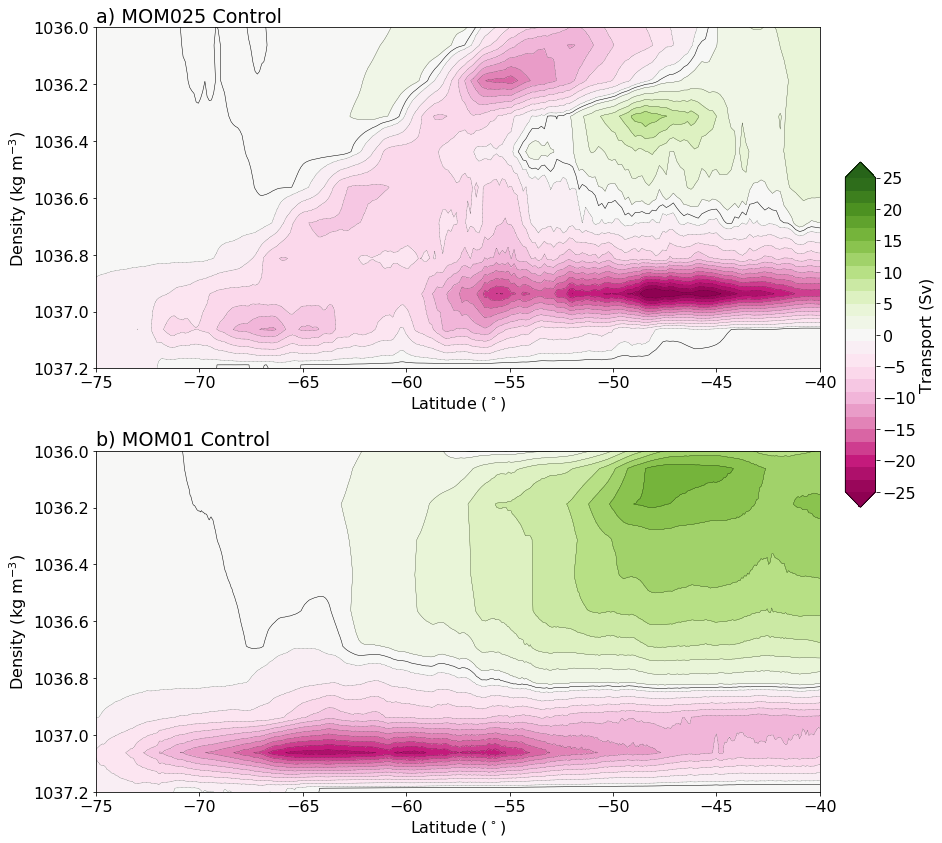

<Figure size 648x1008 with 0 Axes>

In [15]:
#plot GM Net in rho space

plt.figure(figsize(12,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.rcParams['font.size'] = 16

fontsize=16

fig, axs = plt.subplots(2, 1)

plt.rcParams['font.size'] = fontsize

plt.figure(figsize(9,14))
wp_os=3 #1971-1974

yrs=np.arange(1973,2017,1)

t1=0
t2=10
clev = np.arange(-25,27,2)
tick_lvls = np.arange(-25,30,5)

ax = axs[0] #plt.subplot(311)
pcm=ax.contourf(yu_ocean,potrho,np.mean(np_cntrl_gmoc_net[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
ax.contour(yu_ocean,potrho,np.mean(np_cntrl_gmoc_net[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
ax.contour(yu_ocean,potrho,np.mean(np_cntrl_gmoc_net[t1:t2,:,:],axis=0)+np.mean(np_cntrl_gmoc_gm[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
ax.invert_yaxis()
ax.yaxis.set_major_formatter(x_formatter)
ax.axis(ymin=1037.2,ymax=1036, xmin=-75,xmax=-40) #ax.ylim((1037.2,1036))
#ax.ylim((1037.2,1036))
ax.set_ylabel('Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$)')
#ax.xlim([-75,-40])
tit='a) MOM025 Control'
ax.set_title(tit,loc='left')
#plt.plot([-75,-20], [1036.86,1036.86], 'k')
#cb.remove()

ax = axs[1] #plt.subplot(312)
pcm=ax.contourf(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,0:1351],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('Sv')
ax.contour(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,0:1351],axis=0),levels=clev,colors='k',linewidths=0.25)
ax.contour(yu_ocean2,potrho2,np.mean(cntrl_gmoc_ann[t1:t2,:,0:1351],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
ax.invert_yaxis()
ax.yaxis.set_major_formatter(x_formatter)
ax.axis(ymin=1037.2,ymax=1036, xmin=-75,xmax=-40) #ax.ylim((1037.2,1036))
ax.set_ylabel('Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$)')
#ax.xlim([-75,-40])
tit='b) MOM01 Control'
ax.set_title(tit,loc='left')

# colorbar:
cbaxes = fig.add_axes([0.99,0.4,0.035,0.4]) 
cb=fig.colorbar(pcm, ax=axs[0:2],cax=cbaxes,ticks=tick_lvls, shrink=0.6)
#ax = plt.gca()
#divider = make_axes_locatable(ax)
#ax3 = plt.axes([0.97,0.5,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#cb.ax.set_xlabel('Sv')
cb.ax.set_ylabel('Transport (Sv)')

fig.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig6_gmoc2.png'
#fig.savefig(of,dpi=220,bbox_inches='tight')